In [6]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:
chessBoardHeight = 6
chessBoardWidth = 9

def getObjPointsImgPoints(imageDirPath):
    images = glob.glob(imageDirPath)
    
    objPoints = []
    imgPoints = []
    
    for imageName in images:
        # Read the image
        img = cv2.imread(imageName)
        #plt.imshow(img)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #plt.imshow(gray)

        ret, corners = cv2.findChessboardCorners(gray, (chessBoardWidth,chessBoardHeight), None)
        print(ret)

        if ret == True:
            cv2.drawChessboardCorners(img, (chessBoardWidth,chessBoardHeight), corners, ret)
            cv2.imshow('img', img)
            cv2.waitKey(500)
        cv2.destroyAllWindows()

True


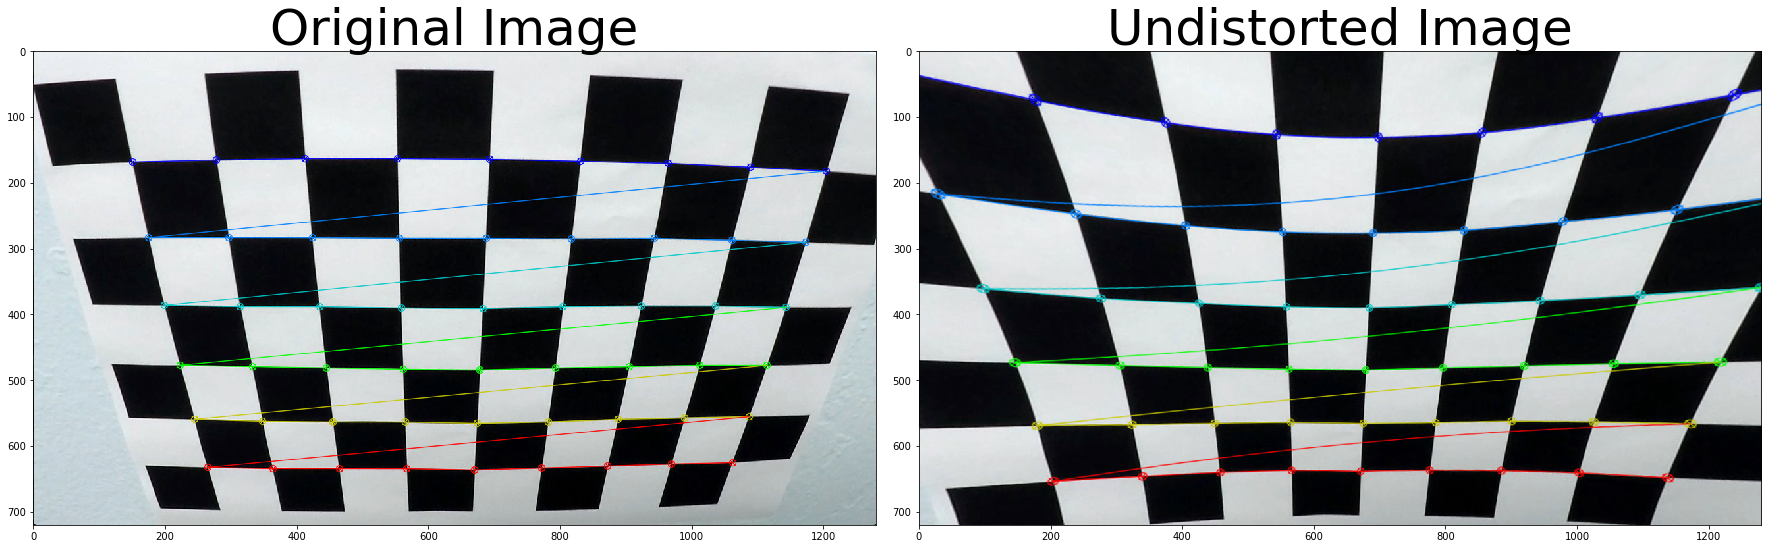

In [5]:
def cal_undistort(img, objpoints, imgpoints):
    img_size = (img.shape[1], img.shape[0])
    
    objpoints, imgpoints = getObjPointsImgPoints('camera_cal/*.jpg')
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)